## Basic PID Implementation

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Plant Function
$$H(s) = \frac{U_p(s)}{M(s)} = \frac{1}{1+ \tau _p s}$$
$$U_p(s) * (1+ \tau _p s) = M(s)$$
$$U_p(s) + (\tau _p s) * U_p(s) = M(s)$$
$$u_p(t) + \tau _p \frac{u_p(t)}{dt} = m(t)$$

#### Discretizing the equation. Sampling at $F_s$
$$u_p(nT_s) + \tau _p \frac{u_p((n+1)T_s) - u_p(nT_s)}{T_s} = m(nT_s)$$

$$u_p(nT_s) + \tau _p \frac{u_p((n+1)T_s) - u_p(nT_s)}{T_s} = m(nT_s)$$

#### Finally getting
$$u_p((n+1)T_s) = \left(1 -\frac{T_s}{\tau _p}\right) u_p(nT_s) +  \left(\frac{T_s}{\tau _p} \right) m(nT_s)$$



In [ ]:
# Initialization

Fs = 100 # Sampling Frequency
Tf = 10 # Final Time
Ti = 0 # Initial Time

Ts = 1 / Fs

In [ ]:
# Number of samples
n_samples = math.floor(Tf / Ts) 
t = np.arange(Ti,Tf,Ts)


In [132]:
# Parameters
tau = 2
Kp = 5
Ki = 5
Kd = 0.1

In [134]:
# Step response
m = np.ones(n_samples+1)
m_cont = np.zeros(n_samples+1)

y_open_loop = np.zeros(n_samples+1)
y = np.zeros(n_samples+1)
y_sp = 2*np.ones(n_samples+1) # Reference


e = np.zeros(n_samples+1)
int_e = np.zeros(n_samples+1)
diff_e = np.zeros(n_samples+1)

In [135]:
for i in range(0,n_samples):
    y_open_loop[i+1] = (1 - (Ts/tau))*y_open_loop[i] + (Ts/tau)*m[i]
    y[i+1] = (1 - (Ts/tau))*y[i] + (Ts/tau)*m_cont[i]
    
    e[i+1] = y_sp[i+1] - y[i+1] # Calculation of Error
    int_e[i+1] = int_e[i] + Ts* e[i+1] # Calculation of Integral of Error
    diff_e[i+1] = (e[i+1] - e[i]) /Ts # Calculation of Derivative of Error
    m_cont[i+1] = Kp* e[i+1] + Ki * int_e[i+1] + Kd* diff_e[i+1] # Calculation of Controller Output
    


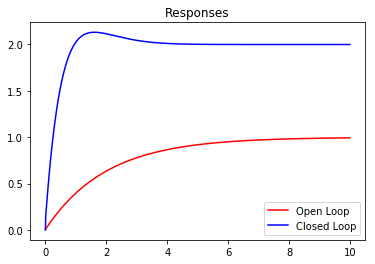

In [136]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t,y_open_loop[1:],'r-', label='Open Loop')
ax.plot(t,y[1:], 'b-', label='Closed Loop')
plt.title('Responses')
ax.legend()
plt.show()
